In [4]:
######### CÉLULA 1 #######################################################################################
# library import
import pandas as pd
import seaborn as sn
import pandas
import numpy
import random
import csv
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from mpl_toolkits.basemap import Basemap # Change 'basemap' to 'Basemap'
import plotly.express as px
import statistics

In [5]:
data = pd.read_csv("teste_indicium_precificacao.csv")

In [6]:
#!pip install basemap
#!pip install basemap-data-hires
#!pip install basemap-data-hires #Install high-resolution data if you want high-resolution maps


In [27]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
data.isna().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [9]:
unicos=data.nunique()
unicos

,0
id,48894
nome,47904
host_id,37457
host_name,11452
bairro_group,5
bairro,221
latitude,19048
longitude,14718
room_type,3
price,674


In [10]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [11]:
agrupado_tipo_bairro = data.groupby("bairro_group")["price"].mean()
print("Média de preço por Grupo de bairro")
print(agrupado_tipo_bairro)

Média de preço por Grupo de bairro
bairro_group
Bronx             87.496792
Brooklyn         124.381983
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [12]:
plot_manh=data.loc[data['bairro_group']=="Manhattan"]
plot_bronx=data.loc[data['bairro_group']=="Bronx"]
plot_brook=data.loc[data['bairro_group']=="Brooklyn"]
plot_Quee=data.loc[data['bairro_group']=="Queens"]
plot_staten=data.loc[data['bairro_group']=="Staten Island"]

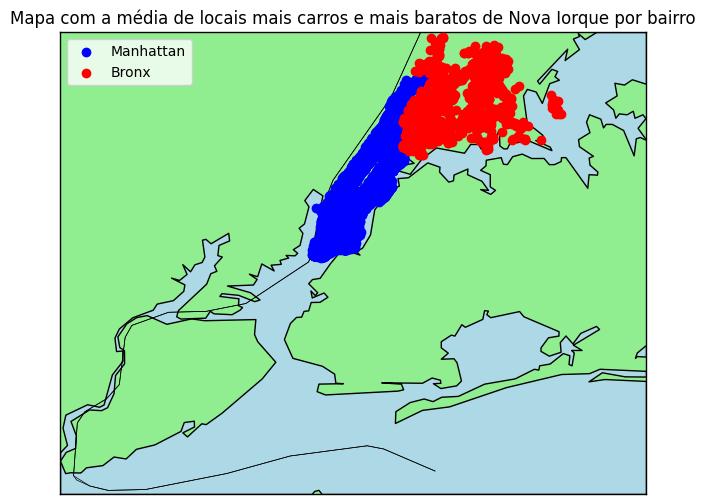

In [13]:
lat_manh = plot_manh['latitude'].values
lon_manh = plot_manh['longitude'].values
lat_bronx = plot_bronx['latitude'].values
lon_bronx = plot_bronx['longitude'].values
# Configurando o tamanho da figura
fig = plt.figure(figsize=(8, 6), edgecolor='w')

# Configurando o mapa para a região de Nova York
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=40.4774, urcrnrlat=40.9176,  # Limites de latitude
            llcrnrlon=-74.2591, urcrnrlon=-73.7004)  # Limites de longitude

# Desenhando os detalhes no mapa
m.drawcoastlines()
m.drawcountries()
m.drawstates()  # Adiciona os estados
m.drawmapboundary(fill_color='lightblue')  # Cor para o fundo do oceano
m.fillcontinents(color='lightgreen', lake_color='lightblue')  # Cor para a terra

# Adicionando os pontos
x_m, y_m = m(lon_manh, lat_manh)  # Convertendo coordenadas para o sistema do mapa
x_b, y_b = m(lon_bronx, lat_bronx)  # Convertendo coordenadas para o sistema do mapa

m.scatter(x_m, y_m, marker='o', color='blue', zorder=5, label='Manhattan')
m.scatter(x_b, y_b, marker='o', color='red', zorder=5, label='Bronx')

# Adicionando a legenda

# Exibindo o gráfico
plt.legend()
plt.title("Mapa com a média de locais mais carros e mais baratos de Nova Iorque por bairro")
plt.show()


In [14]:
agrupado_tipo_quarto = data.groupby("room_type")["price"].mean()
print("Média de preço por tipo de quarto:")
print(agrupado_tipo_quarto)

Média de preço por tipo de quarto:
room_type
Entire home/apt    211.794246
Private room        89.778320
Shared room         70.127586
Name: price, dtype: float64


Média de preço por disponibilidade:


Text(0, 0.5, 'Frequência')

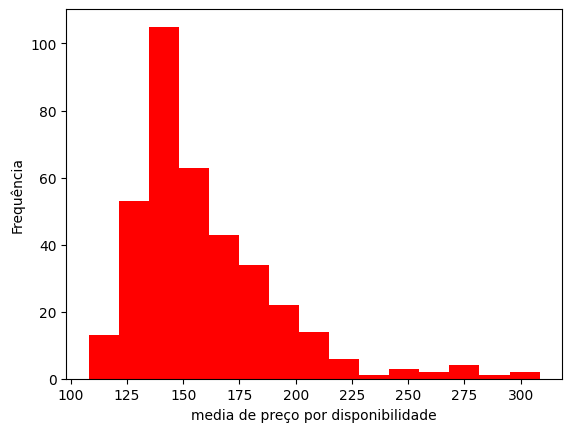

In [33]:
agrupado_dispo = data.groupby("disponibilidade_365")["price"].mean()
print("Média de preço por disponibilidade:")
plt.hist(agrupado_dispo, color='red', bins=15)
plt.xlabel("media de preço por disponibilidade")
plt.ylabel("Frequência")

In [16]:
# Variáveis independentes (features) e dependente (target)
from sklearn.model_selection import train_test_split #Bibliotecas
from sklearn.ensemble import RandomForestRegressor   #Bibliotecas
X = data[['disponibilidade_365', 'reviews_por_mes', 'minimo_noites', 'numero_de_reviews', 'latitude', 'longitude']]
y = data['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
# Treinando o modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [36]:
# prevendo os dados de teste
y_pred = model.predict(X_test)

# Exibindo previsões e valores reais
print("Previsões:", y_pred)
print("Valores reais:", y_test.values)

Previsões: [150.474 125.346  85.916 ... 335.756 130.728 135.262]
Valores reais: [110  40  57 ... 242 100  90]


In [37]:
# Calculando as métricas de avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = numpy.sqrt(mean_squared_error(y_test, y_pred))

print(f"Valor médio absoluto (MAE): {mae}") # está mais distante dos outliers
print(f"Erro quadrático médio (RMSE): {rmse}") #Mais pertos dos outliers, pois se aproxima de valores discrepantes


Valor médio absoluto (MAE): 78.28414098237721
Erro quadrático médio (RMSE): 224.21760522810638


In [38]:
# Dados de entrada
novo_dado = pd.DataFrame({
    'disponibilidade_365': [355],
    'reviews_por_mes': [0.38],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'latitude': [40.75362],
    'longitude': [-73.98377]
})

# Fazendo a previsão
previsao_preco = model.predict(novo_dado)
print(previsao_preco)

[247.738]


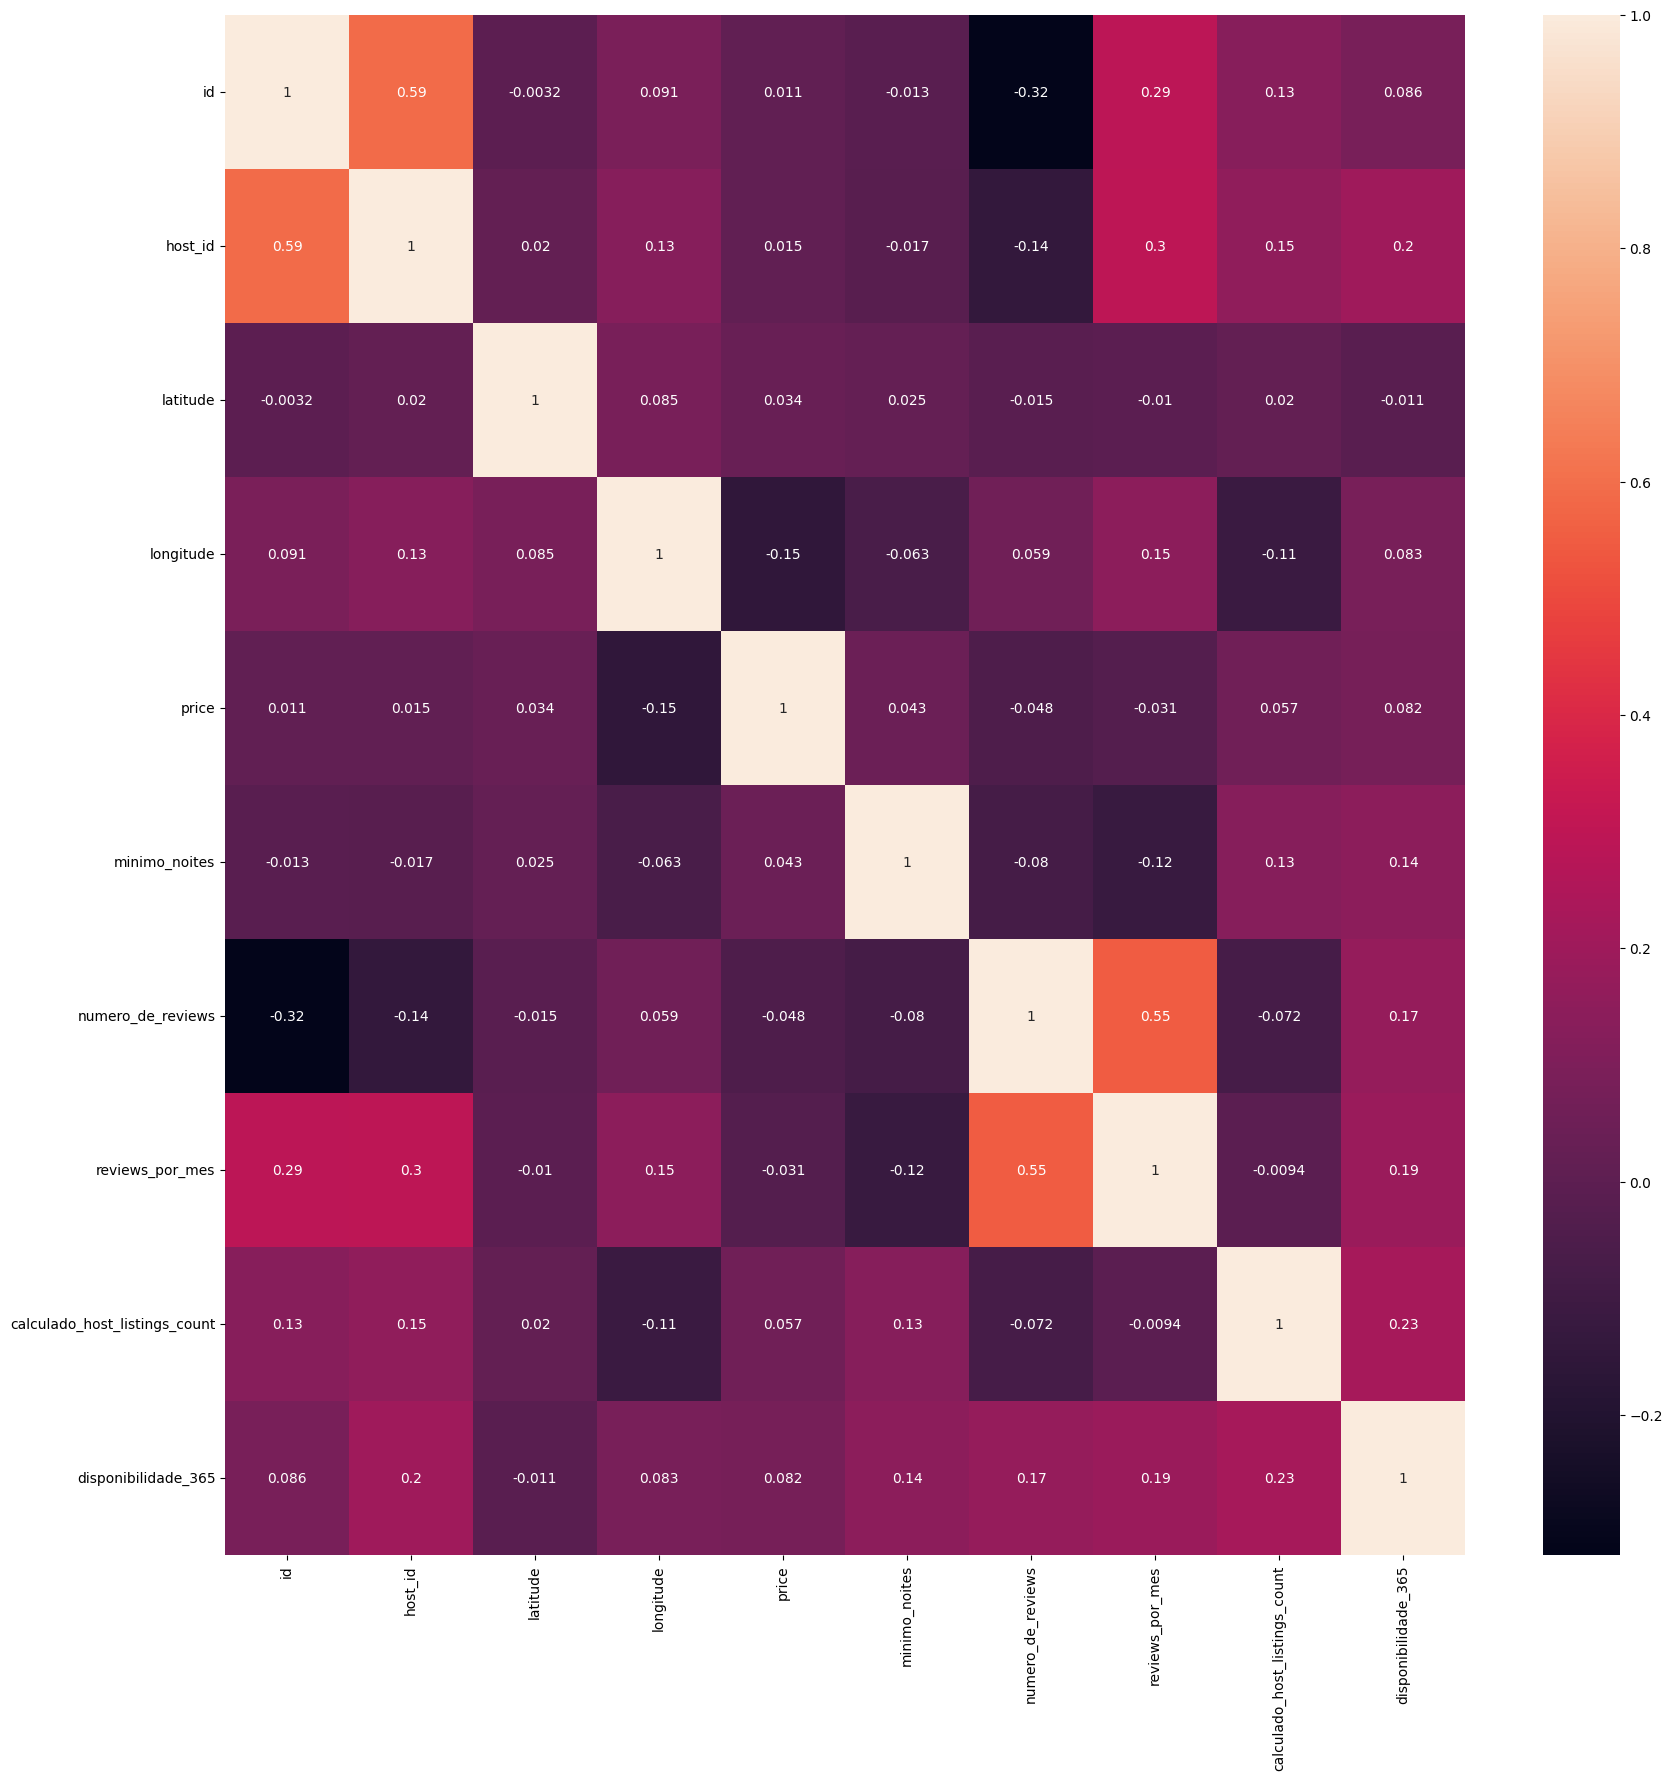

In [22]:
# Selecionando apenas colunas numéricas
numerical_data = data.select_dtypes(include=['number'])

# Calculando a matriz de correlação apenas para as colunas numéricas
figura = plt.figure(figsize=(20, 20))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [23]:
modelo_disp = smf.ols('price ~ disponibilidade_365', data)
resultado = modelo_disp.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     329.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.03e-73
Time:                        11:54:47   Log-Likelihood:            -3.3722e+05
No. Observations:               48894   AIC:                         6.744e+05
Df Residuals:                   48892   BIC:                         6.745e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             135.8816      1.425     95.324      0.000     133.088     138.676
disponibilidade_365     0.1493      0.008     18.155      0.000       0.133       0.165
==============================================================================
Omnibus:                   105298.654   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        715516813.852
Skew:                          19.207   Prob(JB):                         0.00
Kurtosis:                     594.389   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
modelo_dia_min = smf.ols('price ~ minimo_noites', data)
resultado1 = modelo_dia_min.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     89.72
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.86e-21
Time:                        11:54:47   Log-Likelihood:            -3.3733e+05
No. Observations:               48894   AIC:                         6.747e+05
Df Residuals:                   48892   BIC:                         6.747e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       149.1978      1.147    130.068      0.000     146.949     151.446
minimo_noites     0.5011      0.053      9.472      0.000       0.397       0.605
==============================================================================
Omnibus:                   104993.052   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        698194204.048
Skew:                          19.081   Prob(JB):                         0.00
Kurtosis:                     587.173   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#modelo_review = smf.ols('price ~ ultima_review', data)
#resultado2 = modelo_review.fit()
#resultado2.summary()


In [26]:
casa_apt=data.loc[data['room_type']=="Entire home/apt"]
#casa_apt = data['room_type']
modelo_casa_apt = smf.ols('price ~ casa_apt', data)
resultado1 = modelo_casa_apt.fit()
resultado1.summary()

PatsyError: categorical data cannot be >1-dimensional

In [ ]:
resultado.params